<a href="https://colab.research.google.com/github/VAASUsr/Srividhya/blob/main/mine_ptoject_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# step 1: create some sample sales data
data ={

       "OrderID":[1,2,3,4,5],
       "Customer":["Ram","Priya","Anil","Kavya","Raj"],
       "Product":["Laptop","Phone","shirt","Shoes","Tablet"],
       "Quantity":[1,2,3,2,1],
       "Price":[50000,20000,1500,3000,30000],
       "Date":["2024-01-02","2024-01-05","2024-01-07","2024-01-09","2024-01-11"]
}

# step 2: save it as a CSV file in colab
df = pd.DataFrame(data)
df.to_csv("retail_sales.csv",index=False)

print("retail_sales.csv file created in colab")

retail_sales.csv file created in colab


In [ ]:
# step 3: Read the file
df = pd.read_csv("retail_sales.csv")

# show first 5 rows
print(df.head())

   OrderID Customer Product  Quantity  Price        Date
0        1      Ram  Laptop         1  50000  2024-01-02
1        2    Priya   Phone         2  20000  2024-01-05
2        3     Anil   shirt         3   1500  2024-01-07
3        4    Kavya   Shoes         2   3000  2024-01-09
4        5      Raj  Tablet         1  30000  2024-01-11


In [ ]:
df["Total"] = df["Quantity"] * df["Price"]
print(df)

   OrderID Customer Product  Quantity  Price        Date  Total
0        1      Ram  Laptop         1  50000  2024-01-02  50000
1        2    Priya   Phone         2  20000  2024-01-05  40000
2        3     Anil   shirt         3   1500  2024-01-07   4500
3        4    Kavya   Shoes         2   3000  2024-01-09   6000
4        5      Raj  Tablet         1  30000  2024-01-11  30000


In [ ]:
import sqlite3

# creat a connection to a temporary database in memory
conn = sqlite3.connect(':memory:')

# send your pandasn datafram into this SQL database
df.to_sql('sales',conn, index=False, if_exists='replace')




5

In [ ]:
query = "SELECT * FROM sales LIMIT 5"
result = pd.read_sql_query(query,conn)
print(result)

   OrderID Customer Product  Quantity  Price        Date  Total
0        1      Ram  Laptop         1  50000  2024-01-02  50000
1        2    Priya   Phone         2  20000  2024-01-05  40000
2        3     Anil   shirt         3   1500  2024-01-07   4500
3        4    Kavya   Shoes         2   3000  2024-01-09   6000
4        5      Raj  Tablet         1  30000  2024-01-11  30000


In [ ]:
query ="""
SELECT product, SUM(Total) AS TotalRevenue
FROM sales
GROUP BY product
ORDER BY TotalRevenue DESC
"""
result = pd.read_sql(query,conn)
print(result)

  Product  TotalRevenue
0  Laptop         50000
1   Phone         40000
2  Tablet         30000
3   Shoes          6000
4   shirt          4500


In [ ]:
query = """
SELECT Date, product, Total
FROM sales
WHERE Date LIKE '2024-01-05'
"""
result = pd.read_sql(query,conn)
print(result)

         Date Product  Total
0  2024-01-05   Phone  40000


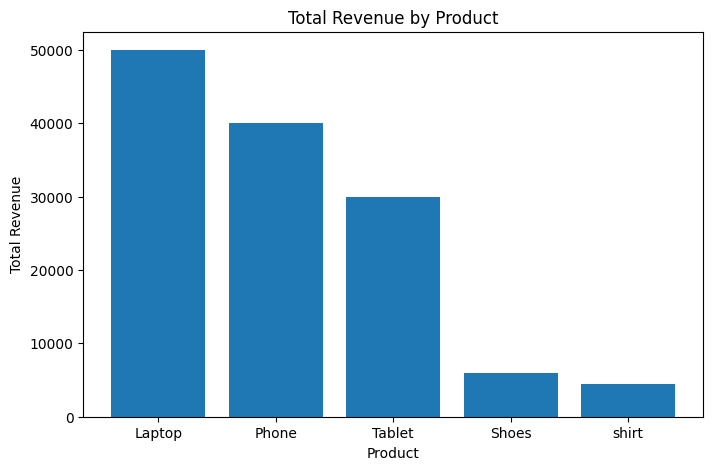

In [ ]:
import matplotlib.pyplot as plt

# Run SQL query
query ="""
SELECT product, SUM(Total) AS TotalRevenue
FROM sales
GROUP BY product
ORDER BY TotalRevenue DESC;
"""
result = pd.read_sql(query, conn)

# plot bar chart
plt.figure(figsize=(8,5))
plt.bar(result['Product'],result['TotalRevenue'])
plt.xlabel('Product')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Product')
plt.show()

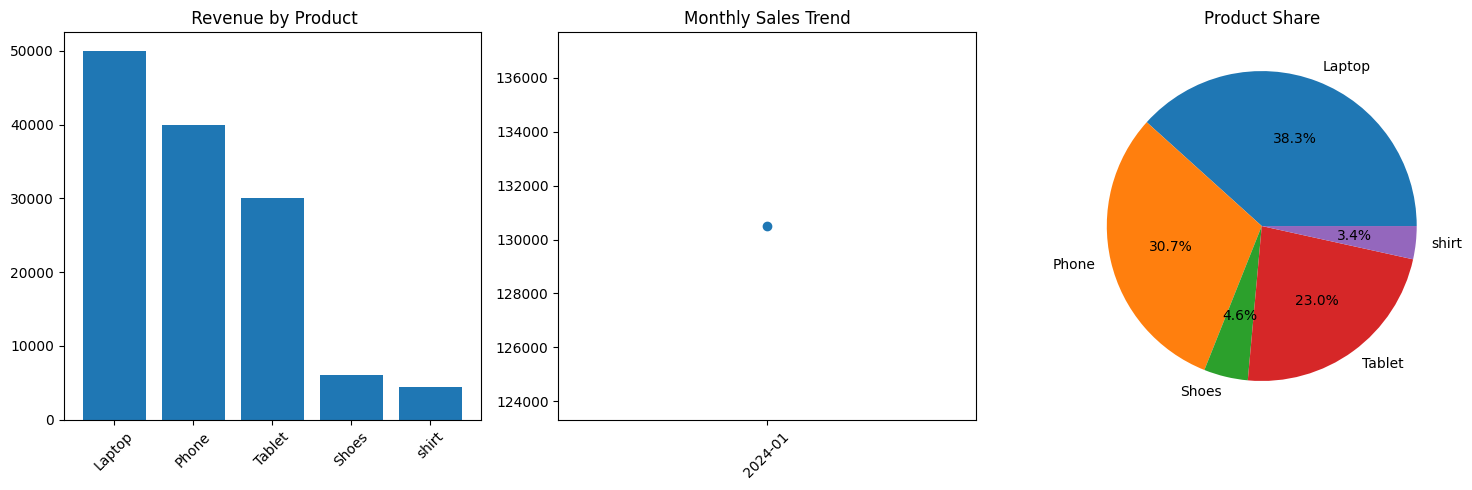

In [ ]:
 # 1. Revenue by product
 query1 = """
 SELECT product, SUM(Total) AS TotalRevenue
 FROM sales
 GROUP BY product
 ORDER BY TotalRevenue DESC;
 """
 rev_by_product = pd.read_sql(query1, conn)

 # 2. Monthly sales Trend
 query2 = """
 SELECT strftime('%Y-%m', Date) AS Month, SUM(Total) AS MonthlyRevenue
 FROM sales
 GROUP BY Month
 ORDER BY Month;
 """
 monthly_sales = pd.read_sql(query2, conn)

 # 3. Category Share
 query3 = """
 SELECT Product, SUM(Total) AS ProductRevenue
 FROM sales
 GROUP BY Product;
 """
 category_share = pd.read_sql(query3, conn)

 # ----plot in one dashboard ----
plt.figure(figsize=(15,5))


# Subplot 1 - Bar
plt.subplot(1,3,1)
plt.bar(rev_by_product['Product'],rev_by_product['TotalRevenue'])
plt.title(" Revenue by Product")
plt.xticks(rotation=45)

# Subplot 2 - Line
plt.subplot(1,3,2)
plt.plot(monthly_sales['Month'],monthly_sales['MonthlyRevenue'],marker='o')
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)

# Subplot 3 - Pie
plt.subplot(1,3,3)
plt.pie(category_share['ProductRevenue'],labels=category_share['Product'],autopct='%1.1f%%')
plt.title("Product Share")

plt.tight_layout()
plt.show()